### Goals
In this lab, I will explore feature engineering and polynomial regression to use linear regression tools for fitting complex, non-linear functions.


# Feature Engineering and Polynomial Regression Overview

Linear regression models take the form  
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1} + b \tag{1}$$  
However, many relationships in data are non-linear. For instance, housing prices often curve with living area rather than increasing linearly. To model such curves, I can extend linear regression by transforming features (e.g., adding $x^2$, $x^3$, etc.). Adjusting $\mathbf{w}$ and $\mathbf{b}$ in (1) alone cannot capture non-linear patterns without these engineered features.


## Polynomial Features

Now I move to a non-linear case and fit a simple quadratic curve: $y = 1 + x^2$.

All the functions used are in *lab_utils.py*. I use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html), a NumPy routine that concatenates arrays along columns.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

Iteration 0: Cost 1.41906e+04
Iteration 100: Cost 6.95923e+02
Iteration 200: Cost 5.89279e+02
Iteration 300: Cost 5.26884e+02
Iteration 400: Cost 4.90378e+02
Iteration 500: Cost 4.69019e+02
Iteration 600: Cost 4.56522e+02
Iteration 700: Cost 4.49210e+02
Iteration 800: Cost 4.44932e+02
Iteration 900: Cost 4.42429e+02


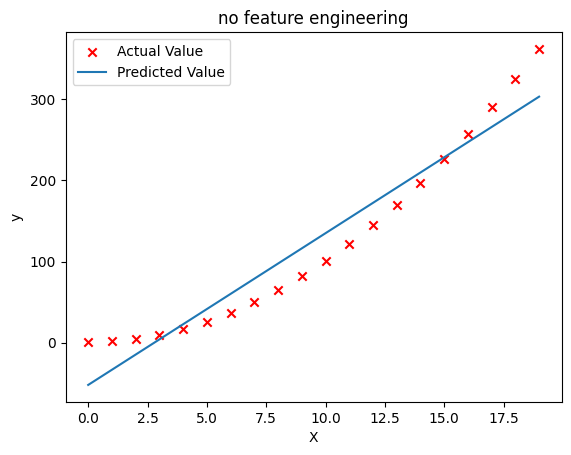

In [3]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

The model doesn’t fit well. I need a polynomial term such as  
$y = w_0x^2 + b$.  
To achieve this, I modify the input by squaring $x$, replacing $X$ with $X^2$, which adds the required nonlinearity.


In [4]:
# Create target data to fit a non-linear function
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features that means adding a new feature that is the square of the original feature
X = x**2      #<-- added engineered feature

## `run_gradient_descent_feng` Function

### Purpose
A simplified gradient descent implementation for feature engineering examples that focuses on clean output and easy model comparison.

### Algorithm
1. **Initialize**: Set weights (`w`) to zeros and bias (`b`) to 0
2. **Iterate**: For each iteration:
   - Calculate current cost using `compute_cost_multi()`
   - Compute gradients using `compute_gradient_multi()`
   - Update parameters: `w = w - α × gradient_w`, `b = b - α × gradient_b`
   - Print progress every 100 iterations
3. **Return**: Final optimized weights and bias

### Quick Note: It's difference from `compute_gradient_multi()`
- **`compute_gradient_multi()`**: Just calculates gradients (partial derivatives) for given parameters
- **`run_gradient_descent_feng()`**: Complete optimization loop that:
  - Uses `compute_gradient_multi()` internally
  - Iteratively updates parameters
  - Runs for specified number of iterations
  - Returns final trained model


### Key Features
- **Simplified output**: Returns only final weights (`w`) and bias (`b`)
- **Clean progress tracking**: Prints cost every 100 iterations
- **No verbose logging**: Unlike the detailed version, this shows minimal output
- **Perfect for comparisons**: Ideal for testing models with/without feature engineering

### Parameters
- `X`: Feature matrix (m examples × n features)
- `y`: Target values
- `iterations`: Number of gradient descent steps
- `alpha`: Learning rate

### Returns
- `w`: Final weight parameters (array)
- `b`: Final bias parameter (scalar)

### Use Case
Best suited for:
- Comparing linear vs polynomial regression
- Feature engineering experiments
- When you only need the final model parameters
- Clean, minimal output scenarios

Iteration 0: Cost 1.41906e+04
Iteration 100: Cost 2.26707e-01
Iteration 200: Cost 2.26499e-01
Iteration 300: Cost 2.26292e-01
Iteration 400: Cost 2.26085e-01
Iteration 500: Cost 2.25878e-01
Iteration 600: Cost 2.25671e-01
Iteration 700: Cost 2.25465e-01
Iteration 800: Cost 2.25258e-01
Iteration 900: Cost 2.25052e-01
Iteration 1000: Cost 2.24846e-01
Iteration 1100: Cost 2.24640e-01
Iteration 1200: Cost 2.24435e-01
Iteration 1300: Cost 2.24229e-01
Iteration 1400: Cost 2.24024e-01
Iteration 1500: Cost 2.23819e-01
Iteration 1600: Cost 2.23614e-01
Iteration 1700: Cost 2.23410e-01
Iteration 1800: Cost 2.23205e-01
Iteration 1900: Cost 2.23001e-01
Iteration 2000: Cost 2.22797e-01
Iteration 2100: Cost 2.22593e-01
Iteration 2200: Cost 2.22389e-01
Iteration 2300: Cost 2.22186e-01
Iteration 2400: Cost 2.21982e-01
Iteration 2500: Cost 2.21779e-01
Iteration 2600: Cost 2.21576e-01
Iteration 2700: Cost 2.21373e-01
Iteration 2800: Cost 2.21171e-01
Iteration 2900: Cost 2.20968e-01
Iteration 3000: Cost 2

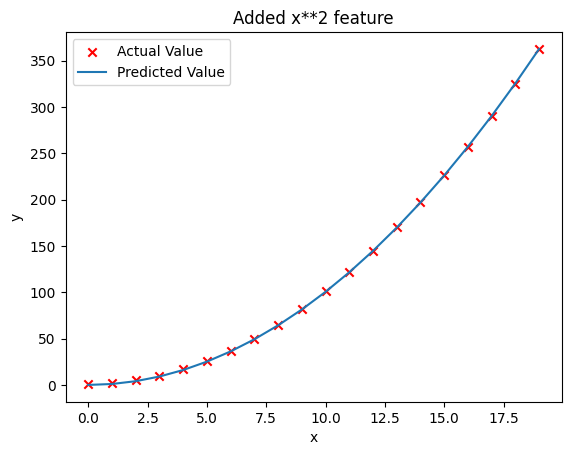

In [7]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix | reshape(-1,1) means that the number of rows is not specified and the number of columns is 1
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Great fit!  
The learned parameters are $\mathbf{w} = 1.0$ and $b = 0.049$, giving the model  
$y = 1 \times x_0^2 + 0.049$, which is very close to the target $y = 1 \times x_0^2 + 1$.  
If I continued training, the match could improve further.


### Selecting Features
<a name='GDF'></a>

In the earlier example, I knew that an $x^2$ term was needed. However, it is not always clear which features should be included. I can test different combinations to find the most effective ones. For instance, I might try:  
$y = w_0x_0 + w_1x_1^2 + w_2x_2^3 + b$


In [8]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

## Feature Engineering Example

### Data Creation
```python
# create target data
x = np.arange(0, 20, 1)
y = x**2
```
- **`x`**: Creates input values from 0 to 19 (20 data points)
- **`y`**: Creates target values using quadratic relationship `y = x²`
- **Relationship**: This is a **non-linear** relationship (quadratic curve)

### Feature Engineering
```python
# engineer features
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
#output example for X: 
[[   0    0     0]
 [   1    1     1]
 [   2    4     8]
 [   3    9    27]
 [   4   16    64]
 [   5   25   125]
 [   6   36   216]]

```
- **`X`**: Creates a feature matrix with 3 engineered features:
  - **Feature 1**: `x` (original linear term)
  - **Feature 2**: `x²` (quadratic term) 
  - **Feature 3**: `x³` (cubic term)
- **`np.c_[]`**: Concatenates arrays column-wise to create feature matrix

### Why This Works
- **Original problem**: Linear regression can't fit `y = x²` well
- **Solution**: Add polynomial features (`x²`, `x³`) to capture non-linear patterns
- **Result**: Linear regression can now model: `y = w₀×x + w₁×x² + w₂×x³ + b`
- **Benefit**: Transforms non-linear problem into linear regression problem

Iteration 0: Cost 1.40666e+04
Iteration 100: Cost 3.78900e+02
Iteration 200: Cost 3.72950e+02
Iteration 300: Cost 3.67093e+02
Iteration 400: Cost 3.61328e+02
Iteration 500: Cost 3.55654e+02
Iteration 600: Cost 3.50069e+02
Iteration 700: Cost 3.44571e+02
Iteration 800: Cost 3.39160e+02
Iteration 900: Cost 3.33834e+02
Iteration 1000: Cost 3.28591e+02
Iteration 1100: Cost 3.23431e+02
Iteration 1200: Cost 3.18352e+02
Iteration 1300: Cost 3.13353e+02
Iteration 1400: Cost 3.08432e+02
Iteration 1500: Cost 3.03588e+02
Iteration 1600: Cost 2.98821e+02
Iteration 1700: Cost 2.94128e+02
Iteration 1800: Cost 2.89509e+02
Iteration 1900: Cost 2.84963e+02
Iteration 2000: Cost 2.80488e+02
Iteration 2100: Cost 2.76083e+02
Iteration 2200: Cost 2.71748e+02
Iteration 2300: Cost 2.67480e+02
Iteration 2400: Cost 2.63280e+02
Iteration 2500: Cost 2.59145e+02
Iteration 2600: Cost 2.55076e+02
Iteration 2700: Cost 2.51070e+02
Iteration 2800: Cost 2.47127e+02
Iteration 2900: Cost 2.43246e+02
Iteration 3000: Cost 2

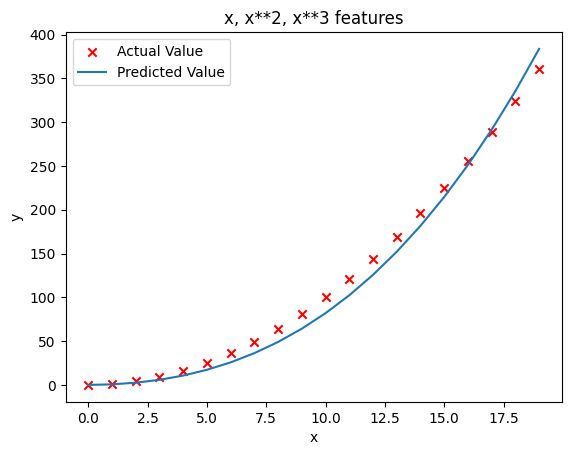

In [9]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## Multiple Weights Explained

### Key Point
**`model_w` is an ARRAY with multiple weights, not a single value!**

### What Happens
```python
# Input: X has 3 features [x, x², x³]
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

# Result: model_w = [w₀, w₁, w₂]  # 3 weights for 3 features
```

### The Math
```python
# Model: y = w₀×x + w₁×x² + w₂×x³ + b
# Matrix: prediction = X @ model_w + model_b
```

**Number of features → Number of weights automatically!**

The trained model has $\mathbf{w} = [0.08, 0.54, 0.03]$ and $b = 0.0106$, so the fitted function is:
$$0.08x + 0.54x^2 + 0.03x^3 + 0.0106$$
Gradient descent increased the weight on $x^2$, showing it is the most relevant feature.  
> Gradient descent highlights important features by adjusting their weights.

Smaller weights indicate less useful features; when a weight approaches zero, that feature contributes little to the model. Here, $x^2$ has the largest weight, making it the most effective in fitting the data.


### Alternate View
In the earlier step, I selected polynomial features based on how well they fit the target data. Another way to see this is that linear regression is still used after creating new features, so the most useful features are those that remain linear with respect to the target. This becomes clearer through an example.


In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3'] # this is for plotting

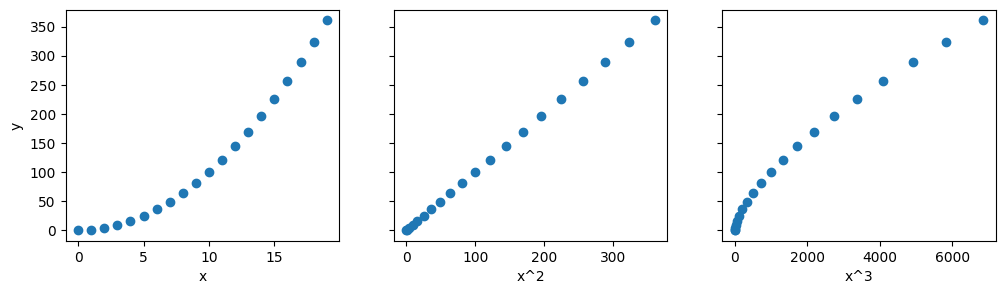

In [11]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()



## Why $x^2$ Works for Linear Regression

### The Key Insight
**The feature $x^2$ shows a linear relationship with the target $y$, so we can fit a linear regression model using it.**

### Original Problem
```python
# Original data
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]  # y = x² (quadratic relationship)
```

**Problem**: Linear regression can't fit `y = x²` well because it's non-linear.

### The Solution: Feature Engineering
```python
# Create new feature
X = np.c_[x, x**2]  # [x, x²]

# Now we have:
# x  | x² | y
# 0  | 0  | 0
# 1  | 1  | 1  
# 2  | 4  | 4
# 3  | 9  | 9
# 4  | 16 | 16
# 5  | 25 | 25
```

### Why It Works
**The relationship between $x^2$ and $y$ is now LINEAR!**

- **$x^2$ vs $y$**: Perfect linear relationship (slope = 1, intercept = 0)
- **Linear regression** can easily fit: `y = w₁ × x² + b`
- **Result**: `w₁ = 1, b = 0` gives perfect fit!

### The Math
```python
# Original: y = x² (non-linear)
# Engineered: y = w₀×x + w₁×x² + b (linear in features)

# For our data: y = 0×x + 1×x² + 0
# Simplified: y = x² (same result, but now linear regression can solve it!)
```

### Key Takeaway
**Feature engineering transforms non-linear problems into linear ones by creating new features that have linear relationships with the target.**

# Let's talk about Scaling features


### Scaling features
When features vary in scale, gradient descent can slow down. In this case, $x$, $x^2$, and $x^3$ differ greatly in magnitude. I apply Z-score normalization to standardize them before training.

#### The Problem: Different Feature Scales

**Example with our polynomial features:**
```python
# Without scaling - features have very different magnitudes:
x = [1, 2, 3, 4, 5]
x² = [1, 4, 9, 16, 25]    # Much larger than x
x³ = [1, 8, 27, 64, 125]  # Even larger than x²
```

**Why this causes problems:**
- **Gradient descent** uses the same learning rate for all features
- **Large features** (x³) dominate the updates
- **Small features** (x) get ignored
- **Convergence** becomes slow and unstable

#### The Solution: Z-Score Normalization

**Z-score formula:** `(feature - mean) / standard_deviation`

**Example transformation:**
```python
# Before scaling:
x = [1, 2, 3, 4, 5]      # mean=3, std=1.58
x² = [1, 4, 9, 16, 25]   # mean=11, std=8.94
x³ = [1, 8, 27, 64, 125] # mean=45, std=49.24

# After Z-score normalization:
x_norm = [-1.26, -0.63, 0, 0.63, 1.26]    # mean=0, std=1
x²_norm = [-1.12, -0.78, -0.22, 0.56, 1.57] # mean=0, std=1
x³_norm = [-0.89, -0.75, -0.37, 0.39, 1.62] # mean=0, std=1
```

#### Benefits of Scaling
- **All features** have similar magnitude (mean=0, std=1)
- **Gradient descent** can update all features equally
- **Faster convergence** and more stable training
- **Better performance** on the same learning rate


In [14]:
# create target data
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X, axis=0)}")

# add mean_normalization 
X_norm, mu, sigma = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


## Peak-to-Peak Range

### Raw Features
- **x**: Range = 19
- **x²**: Range = 361  
- **x³**: Range = 6859
- **Problem**: Very different scales!

### Normalized Features  
- **All features**: Range ≈ 3.46
- **Solution**: Equal scales for better gradient descent!

Now we can try again with a more aggressive value of alpha:

In [16]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

AttributeError: 'tuple' object has no attribute 'shape'

Iteration 0: Cost 1.40666e+04
Iteration 100: Cost 6.43841e+00
Iteration 200: Cost 5.38875e+00
Iteration 300: Cost 5.10263e+00
Iteration 400: Cost 4.94553e+00
Iteration 500: Cost 4.81260e+00
Iteration 600: Cost 4.68646e+00
Iteration 700: Cost 4.56415e+00
Iteration 800: Cost 4.44512e+00
Iteration 900: Cost 4.32921e+00
Iteration 1000: Cost 4.21632e+00
Iteration 1100: Cost 4.10638e+00
Iteration 1200: Cost 3.99931e+00
Iteration 1300: Cost 3.89503e+00
Iteration 1400: Cost 3.79346e+00
Iteration 1500: Cost 3.69455e+00
Iteration 1600: Cost 3.59821e+00
Iteration 1700: Cost 3.50439e+00
Iteration 1800: Cost 3.41301e+00
Iteration 1900: Cost 3.32401e+00
Iteration 2000: Cost 3.23734e+00
Iteration 2100: Cost 3.15293e+00
Iteration 2200: Cost 3.07071e+00
Iteration 2300: Cost 2.99064e+00
Iteration 2400: Cost 2.91266e+00
Iteration 2500: Cost 2.83671e+00
Iteration 2600: Cost 2.76275e+00
Iteration 2700: Cost 2.69071e+00
Iteration 2800: Cost 2.62055e+00
Iteration 2900: Cost 2.55222e+00
Iteration 3000: Cost 2

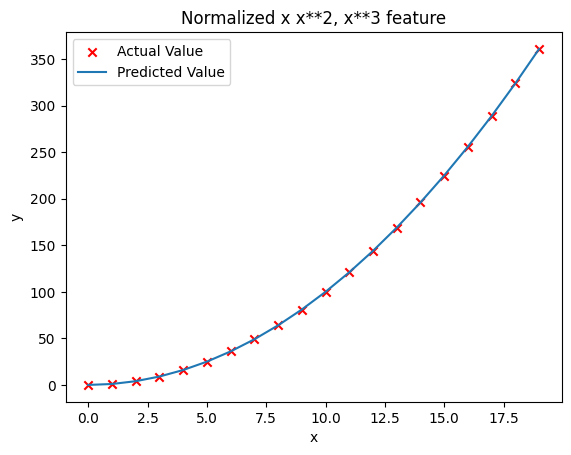

In [17]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]
X_norm, mu, sigma = zscore_normalize_features(X)  # Unpack the tuple!

model_w, model_b = run_gradient_descent_feng(X_norm, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X_norm@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Feature scaling helps my model converge faster.  
The values of $\mathbf{w}$ show that $w_1$ (the $x^2$ term) has the strongest influence, while gradient descent nearly removed the $x^3$ term.


### Complex Functions
With feature engineering, I can model even complex relationships and functions.


Iteration 0: Cost 2.64144e-01
Iteration 100: Cost 1.79803e-01
Iteration 200: Cost 1.61534e-01
Iteration 300: Cost 1.46113e-01
Iteration 400: Cost 1.32594e-01
Iteration 500: Cost 1.20642e-01
Iteration 600: Cost 1.10055e-01
Iteration 700: Cost 1.00674e-01
Iteration 800: Cost 9.23597e-02
Iteration 900: Cost 8.49906e-02
Iteration 1000: Cost 7.84585e-02
Iteration 1100: Cost 7.26679e-02
Iteration 1200: Cost 6.75340e-02
Iteration 1300: Cost 6.29819e-02
Iteration 1400: Cost 5.89451e-02
Iteration 1500: Cost 5.53647e-02
Iteration 1600: Cost 5.21887e-02
Iteration 1700: Cost 4.93708e-02
Iteration 1800: Cost 4.68702e-02
Iteration 1900: Cost 4.46507e-02
Iteration 2000: Cost 4.26801e-02
Iteration 2100: Cost 4.09301e-02
Iteration 2200: Cost 3.93755e-02
Iteration 2300: Cost 3.79939e-02
Iteration 2400: Cost 3.67657e-02
Iteration 2500: Cost 3.56733e-02
Iteration 2600: Cost 3.47013e-02
Iteration 2700: Cost 3.38359e-02
Iteration 2800: Cost 3.30650e-02
Iteration 2900: Cost 3.23777e-02
Iteration 3000: Cost 3

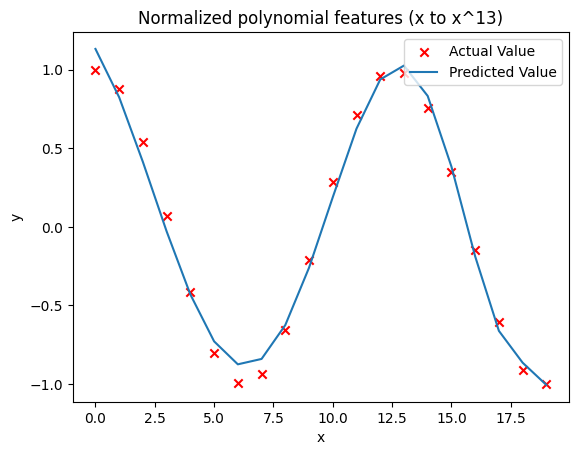

In [20]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X_norm, mu, sigma = zscore_normalize_features(X)  # Unpack the tuple!

model_w, model_b = run_gradient_descent_feng(X_norm, y, iterations=1000000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized polynomial features (x to x^13)")
plt.plot(x, X_norm@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## A Note!

### Why High-Degree Polynomial Features?

#### The Problem
We want to fit `y = cos(x/2)` - a **non-linear, oscillating function** that curves up and down.

#### Problem-Solving Thinking Steps

##### 1. **Identify the Challenge**
- **Linear regression** can only fit straight lines: `y = mx + b`
- **Cosine function** is curved and oscillating
- **Simple polynomial** (x², x³) might not capture the complexity

##### 2. **Feature Engineering Strategy**
```python
# Start simple, then increase complexity:
X = np.c_[x, x**2, x**3]           # Basic polynomial
X = np.c_[x, x**2, x**3, x**4, x**5]  # More terms
X = np.c_[x, x**2, x**3, ..., x**13]  # High-degree polynomial
```

##### 3. **Why High-Degree Polynomials Work**
- **More flexibility**: Higher powers can create complex curves
- **Better approximation**: Can mimic oscillating behavior
- **Taylor series concept**: Any smooth function can be approximated by polynomials

##### 4. **The Trade-off**
- **Pros**: Can fit very complex patterns
- **Cons**: Risk of overfitting, computational cost
- **Solution**: Use regularization or cross-validation

#### Key Insight
**Feature engineering transforms a non-linear problem into a linear regression problem** by creating polynomial features that can capture the underlying pattern.